In [1]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import numpy as np
import face_recognition
import os
import pytz
from datetime import datetime
from csv import DictWriter

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! ls /content/drive/MyDrive/face_recognition


Abhinav.jpg  Aman.jpg  Malay.jpg  Murthy.jpg


In [5]:
path = '/content/drive/MyDrive/face_recognition'
images = []
classNames = []
myList = os.listdir(path)
print(myList)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)

['Murthy.jpg', 'Malay.jpg', 'Aman.jpg', 'Abhinav.jpg']
['Murthy', 'Malay', 'Aman', 'Abhinav']


In [6]:
def findEncodings(images):
    encodeList = []


    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

In [7]:
def markAttendance(name):
    
    
    with open('/content/drive/MyDrive/Attendance.csv', 'a') as f:

                now = datetime.now(pytz.timezone('Asia/Calcutta'))
                dtString = now.strftime("%m/%d/%Y,%H:%M:%S")
                fieldnames = ['Name','Date/Time']
                dict = {'Name': name,'Date/Time': dtString}
                dictwriter_object = DictWriter(f, fieldnames=fieldnames)
                dictwriter_object.writerow(dict)
                f.close()

In [8]:
encodeListKnown = findEncodings(images)
print('Encoding Complete')

Encoding Complete


In [34]:
cap = cv2.VideoCapture(0)

In [35]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


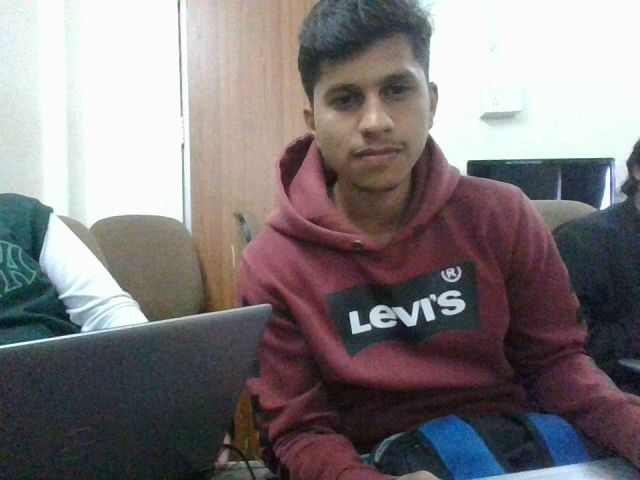

In [36]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [37]:


    img = cv2.imread('photo.jpg')

    imgS = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)

        matchIndex = np.argmin(faceDis)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper()

            y1, x2, y2, x1 = faceLoc
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
            cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            markAttendance(name)


In [38]:
    with open('/content/drive/MyDrive/Attendance.csv', 'r+') as fin:
        myDataList = fin.readlines()
        
    print(myDataList)

['MALAY,"11/08/2022,22:31:25"\n', 'ABHINAV,"11/08/2022,22:33:07"\n', 'MALAY,"11/10/2022,14:55:45"\n', 'MALAY,"11/10/2022,15:01:43"\n', 'MALAY,"11/10/2022,15:01:50"\n', 'AMAN,"11/10/2022,15:13:07"\n']
